# <p style='text-align: center;'>**Data preparation** </p>
<p style='text-align: center;'>prepara the data to use in the models</p>

### notebook contents
the data has 3 shapes with 3 preprocessing techniques 


1. [fetch the data] (#0)


2. visualize & explore the data the data



3. original data
    - the original imbalanced data
    - oversampled data
    - under sampled data
    
    
4. hoged data
    - applied on imbalanced data
    - applied on oversampled data
    - applied on undersampled data
    
    
5. paper technique data
    - applied on imbalanced data
    - applied on oversampled data
    - applied on undersampled data

## Outline

- [fetch the data](#0)
- [visualize & explore the data the data](#1)
- [original data](#2)
    - [1.1 original data imbalanced](#2.1)
    - [1.2 original data oversampled](#2.2)
    - [1.3 original data undersampled](#2.3)
- [the preprocessed data (based on [MortezaHeidaris paper](https://www.sciencedirect.com/science/article/pii/S138650562030959X) )](#3)
    - [2.1 Dot product attention](#2.1)
        - [Exercise 01](#ex01)
    - [2.2 Causal Attention](#2.2)
        - [Exercise 02](#ex02)
    - [2.3 Transformer decoder block](#2.3)
        - [Exercise 03](#ex03)
    - [2.4 Transformer Language model](#2.4)
        - [Exercise 04](#ex04)
- [Part 3: Training](#3)
    - [3.1 Training the model](#3.1)
        - [Exercise 05](#ex05)
- [Part 4: Evaluation](#4)
    - [4.1 Loading in a trained model](#4.1)
- [Part 5: Testing with your own input](#5) 
    - [Exercise 6](#ex06)
    - [5.1 Greedy decoding](#5.1)
        - [Exercise 07](#ex07)



### Introduction

Summarization is an important task in natural language processing and could be useful for a consumer enterprise. For example, bots can be used to scrape articles, summarize them, and then you can use sentiment analysis to identify the sentiment about certain stocks. Anyways who wants to read an article or a long email today, when you can build a transformer to summarize text for you. Let's get started, by completing this assignment you will learn to:  

- Use built-in functions to preprocess your data
- Implement DotProductAttention
- Implement Causal Attention
- Understand how attention works
- Build the transformer model
- Evaluate your model
- Summarize an article

As you can tell, this model is slightly different than the ones you have already implemented. This is heavily based on attention and does not rely on sequences, which allows for parallel computing. 

In [1]:
import glob
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imsave
from imblearn.over_sampling import SMOTE

from sklearn.utils import shuffle
import cv2
from skimage.feature import hog,canny
from skimage.color import rgb2gray
from skimage.filters.rank import entropy
from skimage.morphology import disk

<a name='0'></a>
### fetch the data

In [80]:
#fetch the data
normal_cells = glob.glob('D:/projects data/dataset/C-NMC_Leukemia/original/imbalanced/training_data/normal/*.bmp')
abnormal_cells = glob.glob('D:/projects data/dataset/C-NMC_Leukemia/original/imbalanced/training_data/abnormal/*.bmp')

len(normal_cells),len(abnormal_cells)

(3229, 6791)

<a name='1'></a>

### visualize & explore the data

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 25.54it/s]


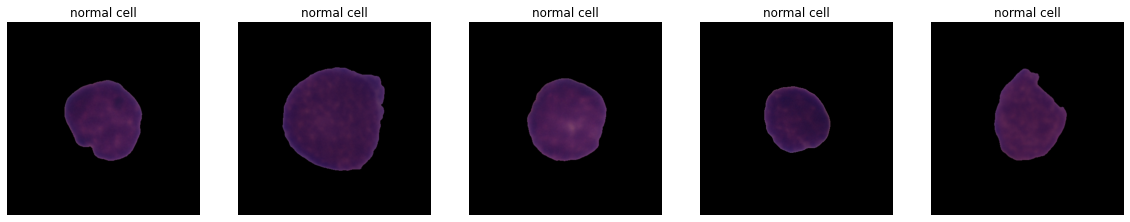

In [14]:
# Viewing some normal Images
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(normal_cells))
    img= plt.imread(normal_cells[rand])
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title('normal cell')

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 19.73it/s]


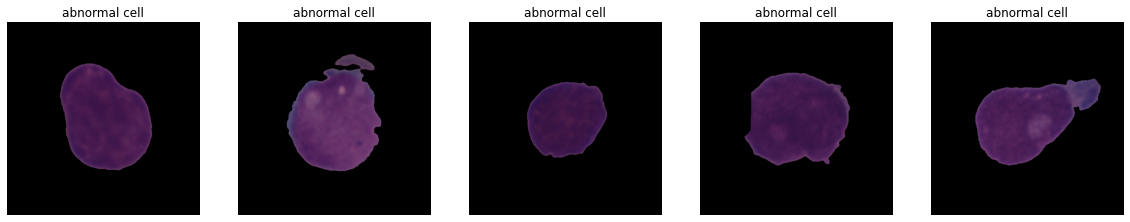

In [20]:
# Viewing some abnormal Images
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20,20))

for i in tqdm(range(0, 5)):
    rand = np.random.randint(len(abnormal_cells))
    img= plt.imread(abnormal_cells[rand])
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title('abnormal cell')

<a name='2'></a>

## 3-the original data

<a name='2.1'></a>

### 3.1-the original imbalanced data 

In [ ]:
# the original imbalanced data (no need to modify)

training_validation_data_path = "D:/projects data/dataset/C-NMC_Leukemia/original/imbalanced/training_data/"
testing_data_path = "D:/projects data/dataset/C-NMC_Leukemia/original/imbalanced/testing_data/"


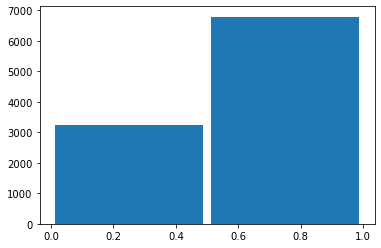

In [17]:
# visualize the data balancing
y=np.concatenate((np.zeros(len(normal_cells)),np.ones(len(abnormal_cells))))
plt.hist(y,bins=2,rwidth=0.95,)
plt.show()

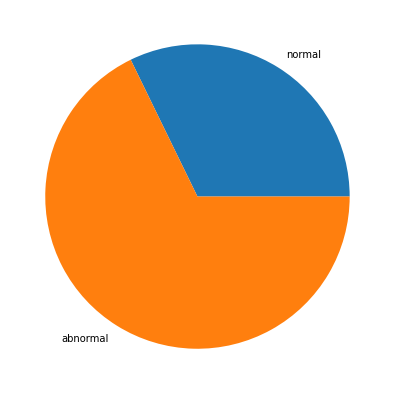

In [18]:
y_sum=[len(normal_cells), len(abnormal_cells)]
y_lab=["normal", "abnormal"]

fig = plt.figure(figsize =(10, 7))
plt.pie(y_sum,labels=y_lab)
plt.show()

In [ ]:
# the visualization shows that the data is totally imbalanced

<a name='2.2'></a>

### 3.2-the original oversampled data 

In [27]:
# original oversampled data (using SMOTE technique)synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.


x=[]
y=[]
#get the data in numpy array
for i in tqdm(range(0,len(normal_cells))):
    img = plt.imread(normal_cells[i])
    x.append(img)
    y.append(0)
    
for i in tqdm(range(0,len(abnormal_cells))):
    img = plt.imread(abnormal_cells[i])
    x.append(img)
    y.append(1)
x=np.array(x)
y=np.array(y)

x.shape,y.shape

100%|██████████████████████████████████████████████████████████████████████████████| 6791/6791 [02:14<00:00, 50.66it/s]


((10020, 450, 450, 3), (10020,))

In [28]:
450*450*3

607500

In [32]:
smote= SMOTE()
#smote function only accept 1d & 2d arrays so I will convert (x,x_val) arrays from 4d -> 2d 
x= np.reshape(x,(10020,607500))
x, y = smote.fit_resample(x, y)

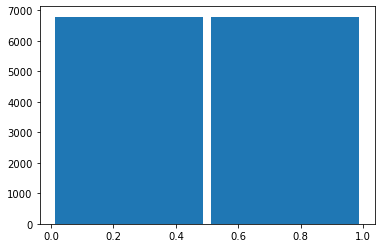

In [33]:
plt.hist(y,bins=2,rwidth=0.95,)
plt.show()

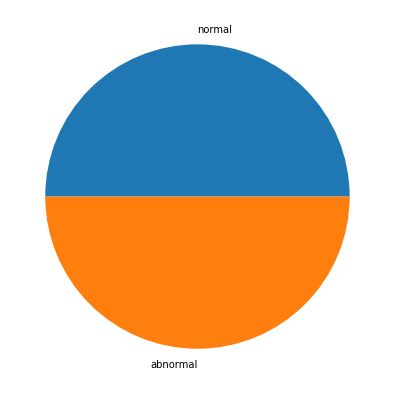

In [34]:
y_sum=[((y==0).sum()), ((y==1).sum())]
y_lab=["normal", "abnormal"]

fig = plt.figure(figsize =(10, 7))
plt.pie(y_sum,labels=y_lab)
plt.show()

In [39]:
(y==0).sum(), (y==1).sum()

(6791, 6791)

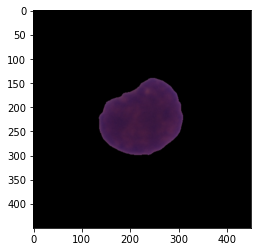

In [49]:
plt.imshow(np.reshape(x[0],(450,450,3)))

In [52]:
# save in folders
for i in tqdm(range(0,len(y))):
    img=np.reshape(x[i],(450,450,3))
    im = Image.fromarray(img)
    if y[i] == 0:
        path = 'D:/projects data/dataset/C-NMC_Leukemia/original/oversampled/normal/' + str(i) + '.bmp'
    else:
        path = 'D:/projects data/dataset/C-NMC_Leukemia/original/oversampled/abnormal/' + str(i) + '.bmp'

    im.save(path)



100%|███████████████████████████████████████████████████████████████████████████| 13582/13582 [02:11<00:00, 103.06it/s]


<a name='2.3'></a>

### 3.3-the original undersampled data 

In [54]:
# original undersampled data
len(normal_cells),len(abnormal_cells)

(3229, 6791)

In [79]:
under_abnormal =pd.DataFrame(abnormal_cells)
under_abnormal.head()

,0
0,D:/projects data/dataset/C-NMC_Leukemia/origin...
1,D:/projects data/dataset/C-NMC_Leukemia/origin...
2,D:/projects data/dataset/C-NMC_Leukemia/origin...
3,D:/projects data/dataset/C-NMC_Leukemia/origin...
4,D:/projects data/dataset/C-NMC_Leukemia/origin...


In [85]:
under_abnormal = under_abnormal.sample(3229)
len(under_abnormal)

3229

In [70]:
under_abnormal=under_abnormal.to_numpy().flatten()
under_abnormal.shape

(3229,)

In [82]:
for i in tqdm(range(0,len(under_abnormal))):
    img = plt.imread(under_abnormal[i])
    im = Image.fromarray(img)
    im.save('D:/projects data/dataset/C-NMC_Leukemia/original/undersampled/abnormal/' + str(i) + '.bmp')

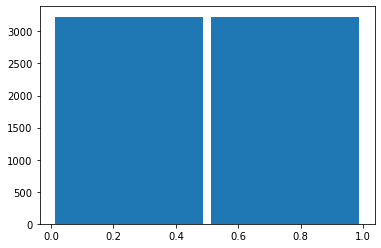

In [86]:
y=np.concatenate((np.zeros(len(normal_cells)),np.ones(len(under_abnormal))))
plt.hist(y,bins=2,rwidth=0.95,)
plt.show()

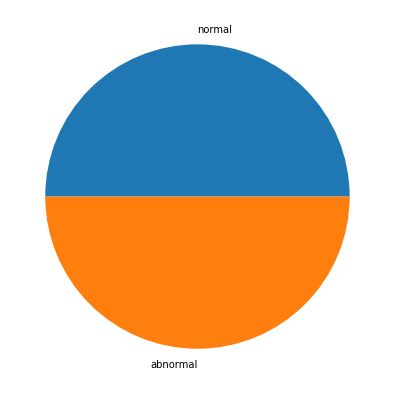

In [87]:
y_sum=[len(normal_cells), len(under_abnormal)]
y_lab=["normal", "abnormal"]

fig = plt.figure(figsize =(10, 7))
plt.pie(y_sum,labels=y_lab)
plt.show()

### prepare test data

In [4]:
test_abnormal =glob.glob('D:/projects data/dataset/C-NMC_Leukemia/final/testing_data/abnormal/*.bmp')
test_normal =glob.glob('D:/projects data/dataset/C-NMC_Leukemia/final/testing_data/normal/*.bmp')
len(test_abnormal),len(test_normal)

(1700, 808)

In [5]:
x_test= []
y_test= []

for path in test_abnormal:
    img=plt.imread(path)
    img=cv2.resize(img,(224,224))
    img =img/255.0
    x_test.append(img)
    y_test.append(0)
    
for path in test_normal:
    img=plt.imread(path)
    img=cv2.resize(img,(224,224))
    img =img/255.0
    x_test.append(img)
    y_test.append(1)
    
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape,y_test.shape

((2508, 224, 224, 3), (2508,))

In [ ]:
x_t,y_t=shuffle()


In [16]:
pickle.dump(x_test, open("D:/projects data/dataset/C-NMC_Leukemia/final/x_test.pkl", 'wb'))
pickle.dump(y_test, open("D:/projects data/dataset/C-NMC_Leukemia/final/y_test.pkl", 'wb'))

<a name='3'></a>

## the preprocessed data (based on [MortezaHeidaris paper](https://www.sciencedirect.com/science/article/pii/S138650562030959X) )

### paper summarization
 the histogram equalization algorithm and bilateral filter are applied to process the original images to generate two sets of filtered images. Then, the original image plus these two filtered images are used as inputs of three channels of the CNN deep learning model, which increase learning information of the model.

In [2]:
def preprocess(img):
    
    gray =rgb2gray(cv2.resize(img,(224,224)))

    fd, hog_image = hog(gray, orientations=8,cells_per_block=(1, 1), visualize=True)
    cann = canny(gray, sigma=1) 

    stacked = np.dstack((gray,cann,hog_image))
    
    return stacked

In [3]:
m_save_folder='D:/projects data/dataset/C-NMC_Leukemia/final/paper preprocessed/imbalanced/'
o_save_folder='D:/projects data/dataset/C-NMC_Leukemia/final/paper preprocessed/oversampled/'
u_save_folder='D:/projects data/dataset/C-NMC_Leukemia/final/paper preprocessed/undersampled/'

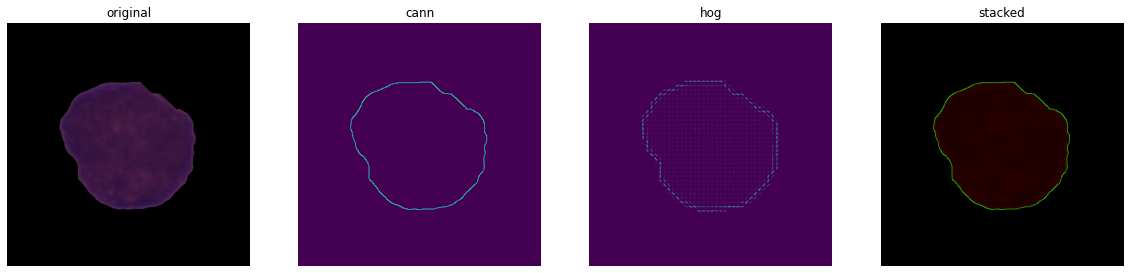

In [6]:
# show preprocessing sample
img=plt.imread(original_abnormal[0])
gray =rgb2gray(img)

fd, hog_image = hog(gray, orientations=8,cells_per_block=(1, 1), visualize=True)

cann = canny(gray, sigma=1) 

stacked = np.dstack((gray,cann,hog_image))

imgs=[img,cann,hog_image,stacked]
titles=['original','cann','hog','stacked']

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20,20))

for i in range(0,4):
    ax[i].imshow(imgs[i])
    ax[i].set_title(titles[i])
    ax[i].axis('off')
    imgs[i].shape

In [2]:
original_abnormal = glob.glob('D:/projects data/dataset/C-NMC_Leukemia/final/original/imbalanced/training_data/abnormal/*.bmp')
original_normal = glob.glob('D:/projects data/dataset/C-NMC_Leukemia/final/original/imbalanced/training_data/normal/*.bmp')
len(original_abnormal),len(original_normal)

(6791, 3229)

### for imbalanced data

In [37]:

for i in tqdm(range(0,len(original_abnormal))):
    
    img=preprocess(plt.imread(original_abnormal[i]))
    
    imsave(m_save_folder+'abnormal/' +str(i) + '.bmp', img)
    
#     im = Image.fromarray(img)
#     im.save(m_save_folder+'abnormal/' +str(i) + '.bmp')

    
for i in tqdm(range(0,len(original_normal))):
    
    img=preprocess(plt.imread(original_normal[i]))
    
    imsave(m_save_folder+'normal/' +str(i) + '.bmp', img)

#     im = Image.fromarray(img)
#     im.save(m_save_folder+'normal/' +str(i) + '.bmp')


100%|██████████████████████████████████████████████████████████████████████████████| 3229/3229 [06:57<00:00,  7.74it/s]


### for oversampled data

In [39]:
original_abnormal_o = glob.glob('D:/projects data/dataset/C-NMC_Leukemia/final/original/oversampled/abnormal/*.bmp')
original_normal_o = glob.glob('D:/projects data/dataset/C-NMC_Leukemia/final/original/oversampled/normal/*.bmp')
len(original_abnormal_o),len(original_normal_o)

(6791, 6791)

In [40]:

for i in tqdm(range(0,len(original_abnormal_o))):
    
    img=preprocess(plt.imread(original_abnormal_o[i]))
    
    imsave(o_save_folder+'abnormal/' +str(i) + '.bmp', img)
    
#     im = Image.fromarray(img)
#     im.save(m_save_folder+'abnormal/' +str(i) + '.bmp')

    
for i in tqdm(range(0,len(original_normal_o))):
    
    img=preprocess(plt.imread(original_normal_o[i]))
    
    imsave(o_save_folder+'normal/' +str(i) + '.bmp', img)

#     im = Image.fromarray(img)
#     im.save(m_save_folder+'normal/' +str(i) + '.bmp')

100%|██████████████████████████████████████████████████████████████████████████████| 6791/6791 [16:39<00:00,  6.80it/s]


### for undersampled data

In [42]:
original_abnormal_u = glob.glob('D:/projects data/dataset/C-NMC_Leukemia/final/original/undersampled/abnormal/*.bmp')
original_normal_u = glob.glob('D:/projects data/dataset/C-NMC_Leukemia/final/original/undersampled/normal/*.bmp')
len(original_abnormal_u),len(original_normal_u)

(3229, 3229)

In [43]:

for i in tqdm(range(0,len(original_abnormal_u))):
    
    img=preprocess(plt.imread(original_abnormal_u[i]))
    
    imsave(u_save_folder+'abnormal/' +str(i) + '.bmp', img)
    
#     im = Image.fromarray(img)
#     im.save(m_save_folder+'abnormal/' +str(i) + '.bmp')

    
for i in tqdm(range(0,len(original_normal_u))):
    
    img=preprocess(plt.imread(original_normal_u[i]))
    
    imsave(u_save_folder+'normal/' +str(i) + '.bmp', img)

#     im = Image.fromarray(img)
#     im.save(m_save_folder+'normal/' +str(i) + '.bmp')

100%|██████████████████████████████████████████████████████████████████████████████| 3229/3229 [09:13<00:00,  5.84it/s]


### prepare x_test

In [3]:
x_test = pickle.load(open("D:/projects data/dataset/C-NMC_Leukemia/final/x_test.pkl", 'rb'))
y_test=  pickle.load(open("D:/projects data/dataset/C-NMC_Leukemia/final/y_test.pkl", 'rb'))

In [4]:
x_test.max()

0.8705882352941177

In [7]:
x_test_pre=[]
for img in x_test:
    x_test_pre.append(preprocess(img))
    
x_test_pre=np.array(x_test_pre)
x_test_pre.shape

(2508, 224, 224, 3)

In [8]:
pickle.dump(x_test_pre, open("D:/projects data/dataset/C-NMC_Leukemia/final/x_test_pre1.pkl", 'wb'))
pickle.dump(y_test, open("D:/projects data/dataset/C-NMC_Leukemia/final/y_test_pre1.pkl", 'wb'))